In [107]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
from permute.core import one_sample
import seaborn as sns

In [9]:
data = pd.read_csv('data/nba.csv').drop(columns="Unnamed: 0")
data.head()

,player,team,atm_away,atm_home,score_away,score_home,atm_total,score_total
0,A. Johnson,ATL,30,34,24,28,64,52
1,A. Johnson,TOR,63,57,44,38,120,82
2,Abdur-Rahim,SAC,114,124,84,90,238,174
3,Afflalo,DEN,236,284,189,227,520,416
4,Afflalo,DET,75,88,62,67,163,129


Если дома игроки бросают лучше, то доля успешных бросков для дома должна быть выше.

In [11]:
data['percent_home'] = data['score_home']/data['atm_home']
data['percent_away'] = data['score_away']/data['atm_away']

In [14]:
data.head()

,player,team,atm_away,atm_home,score_away,score_home,atm_total,score_total,percent_home,percent_away
0,A. Johnson,ATL,30,34,24,28,64,52,0.823529,0.800000
1,A. Johnson,TOR,63,57,44,38,120,82,0.666667,0.698413
2,Abdur-Rahim,SAC,114,124,84,90,238,174,0.725806,0.736842
3,Afflalo,DEN,236,284,189,227,520,416,0.799296,0.800847
4,Afflalo,DET,75,88,62,67,163,129,0.761364,0.826667


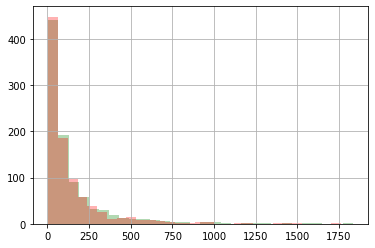

In [75]:
data['score_home'].hist(bins=30, color='green', alpha=0.3)
data['score_away'].hist(bins=30, alpha=0.3, color='red')

# Test

In [57]:
p_value, t, d = one_sample(data['percent_home'], data['percent_away'], alternative='greater', keep_dist=True)

In [83]:
p_value

0.18507814921850782

In [86]:
st.wilcoxon(data['percent_home'], data['percent_away'], alternative='greater')

WilcoxonResult(statistic=232267.0, pvalue=0.04542543790748596)

По критерию Уилкоксона отклоняем нулевую гипотезу ($\alpha = 0.05$) о равенстве средних в пользу альтернативы о том что процент попаданий дома больше.

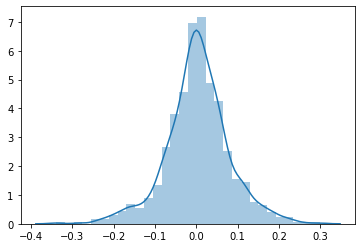

In [109]:
sns.distplot(data['percent_home'] - data['percent_away'], bins=30)
plt.show()

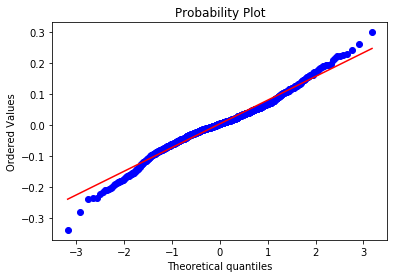

In [99]:
qq_points, qq_line = st.probplot(data['percent_home'] - data['percent_away'], plot=plt)

In [128]:
st.shapiro(data['percent_home']-data['percent_away'])

(0.9809169769287109, 1.014018202738498e-09)

Тест Шапиро-Уилка на нормальность позволяет нам понять, что разница в долях успешных бросков распределена не нормально.

Будем считать, что существенными различиями в успехе будут различия "выше среднего", то есть больше правой границы 99% доверительного интервала для среднего.

In [171]:
s = (np.std(data['percent_home']-data['percent_away'], ddof=1))**2
mean = np.mean(data['percent_home']-data['percent_away'])
n = len(data['percent_home']-data['percent_away'])
alpha = 0.01
t = st.t.ppf(1-alpha/2.0, df=n-1)
[mean-t*s/np.sqrt(n), mean + t*s/np.sqrt(n)] # Доверительный интервал для среднего

[0.002860762224406643, 0.003865645795189353]

In [172]:
print(f"Процент, для которых различие существенно: \
{100.0*np.mean((data['percent_home']-data['percent_away']) > mean+t*s/np.sqrt(n))} %")

Процент, для которых различие существенно: 49.89316239316239 %
